# Basics of DNA strings

In [1]:
# generate a random nucleotide from A, T, G and C
import random
for _ in range(10): # we generate this 10 times and print it below
    print(random.choice('ACGT'))

G
A
A
A
G
T
G
A
G
A


In [9]:
# generate a random sequence that 100 nucleotides long
# not sure what this well correspond to, but we shall do it for fun anyway!
n_length = 100
random.seed(123) # we fix the seed such that seq1 and seq2 generate the same sequence
seq1 = ''
for _ in range(n_length):
    seq1 += random.choice('ACGT')
print(seq1)

# an alternative method to generate 
random.seed(123) # we fix the seed such that seq1 and seq2 generate the same sequence
seq2 = ''.join([random.choice('ACGT') for _ in range(n_length)])
print(seq2)

AGATGAATGGACCGGCCATATAAGTAAACCAGTTGTAGGTCGATTTTGACATGCGGTATTGACAGAGCTAGTCTCCTTTAACTCAGGGTTAAAGAATATA
AGATGAATGGACCGGCCATATAAGTAAACCAGTTGTAGGTCGATTTTGACATGCGGTATTGACAGAGCTAGTCTCCTTTAACTCAGGGTTAAAGAATATA


# Given two strings we want to know what is the longest common sequence?

In [11]:
# A common way of finding the longest common prefix is below

def longestCommonPrefix(s1, s2):
    n1, n2 = len(s1), len(s2)
    i = 0
    while i < n1 and i < n2 and s1[i] == s2[i]:
        i += 1
    return s1[:i]

# Example usage:
print(longestCommonPrefix('ATGCTTG', 'ATGCTACAC'))  # Output: ACCA

ATGCT


In [13]:
# We can write the equivalent algorithm in a much concise way as below
from itertools import takewhile

def longestCommonPrefix(s1, s2):
    return ''.join(x for x, y in takewhile(lambda p: p[0] == p[1], zip(s1, s2)))

# Example usage:
print(longestCommonPrefix('ATGCTTG', 'ATGCTACAC'))  

ATGCT


# Check if two given strings are same?

In [14]:
def match(s1, s2):
    return s1 == s2

# Example usage:
print(match(seq1, seq2))  # Output: True


True


# Obtain the complementary strand of a given sequence

In [15]:
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t
reverseComplement(seq1)

'TATATTCTTTAACCCTGAGTTAAAGGAGACTAGCTCTGTCAATACCGCATGTCAAAATCGACCTACAACTGGTTTACTTATATGGCCGGTCCATTCATCT'

In [17]:
# A somewhat difficult but relatively smarter way to find the complement is the following implementation:

def reverseComplement(s):
    table = str.maketrans('ACGT', 'TGCA')
    return s[::-1].translate(table)

# Example usage:
print(reverseComplement(seq1))  


TATATTCTTTAACCCTGAGTTAAAGGAGACTAGCTCTGTCAATACCGCATGTCAAAATCGACCTACAACTGGTTTACTTATATGGCCGGTCCATTCATCT


# Obtain the sequence of a virus 

In [18]:
# this will get the FASTA file of lambda virus
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

--2025-03-26 16:34:08--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.155.188.167, 18.155.188.175, 18.155.188.170, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.155.188.167|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa’

lambda_virus.fa     100%[===================>]  48.12K  --.-KB/s    in 0.07s   

2025-03-26 16:34:08 (715 KB/s) - ‘lambda_virus.fa’ saved [49270/49270]



In [19]:
# Read the first n_nucleotide bases of the virus

def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

genome = readGenome('lambda_virus.fa')
n_length = 100
genome[:n_length]

'GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACC'

In [20]:
# Again, an alternative method for this is given below

def readGenome(filename):
    with open(filename, 'r') as f:
        return ''.join(line.strip() for line in f if not line.startswith('>'))

# Example usage:
genome = readGenome('lambda_virus.fa')
n_length = 100
print(genome[:n_length])


GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACC


# Count the individual nucleobases in the genome

In [21]:
# Count the number of occurences of each base
counts = {'A': 0, 'C': 0, 'G': 0, 'T': 0}
for base in genome:
    counts[base] += 1
print(counts)

{'A': 12334, 'C': 11362, 'G': 12820, 'T': 11986}


In [24]:
# Alternatively do this

from collections import Counter
counts = {'A': 0, 'C': 0, 'G': 0, 'T': 0}

counts = Counter(genome)
print(counts)


Counter({'G': 12820, 'A': 12334, 'T': 11986, 'C': 11362})


# Below is an example using Python's matplotlib to plot a histogram of the base counts for A, T, G, and C:

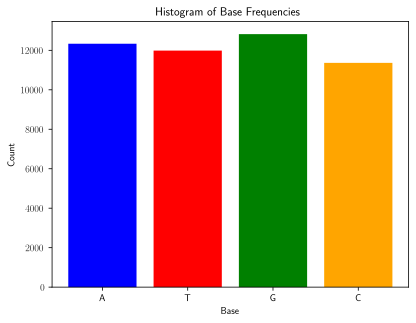

In [26]:
import matplotlib.pyplot as plt
from collections import Counter
%config InlineBackend.figure_formats = ['svg']
import matplotlib
matplotlib.pyplot.rc('text', usetex=True)

# Assuming 'genome' contains the DNA string, e.g.:
# genome = readGenome('lambda_virus.fa')

# Count the occurrences of each base
counts = Counter(genome)

# Order the bases as A, T, G, C
bases = ['A', 'T', 'G', 'C']
base_counts = [counts[base] for base in bases]

# Create a bar chart
plt.bar(bases, base_counts, color=['blue', 'red', 'green', 'orange'])
plt.xlabel('Base')
plt.ylabel('Count')
plt.title('Histogram of Base Frequencies')
plt.show()
